# Home Exercise on Linear Regression

## Task Description

Implement a **linear regression** model using **gradient descent, Adam, or any other optimization method** to optimize the parameters, or use a **closed-form solution**. *(You can also implement variations of Linear Regression, such as Lasso, Ridge, etc., but you must implement them yourself.)*

- You are **only allowed** to use **computational libraries** such as **NumPy, Math, etc.** for implementing the **model and training process**.
- You **must not** use machine learning libraries or frameworks like **scikit-learn, TensorFlow, PyTorch, etc.** that provide pre-built models.
- For other tasks (e.g., data processing, visualization), you are free to use **any library**.

After implementing the model, use it to solve the following problem:  
[**Housing Prices Competition for Kaggle Learn Users**](https://www.kaggle.com/competitions/home-data-for-ml-course)

---

## Submission Guidelines

- Submit **only one Jupyter Notebook** file that:
  1. **Handles all tasks**, including **data downloading, preprocessing, model training** and **evaluation**.
  2. **Generates a CSV** result file.
  3. **Includes an image** of the submission results on Kaggle.

- **Important**:
  - **Submissions not following the guidelines will receive a score of 0.**

---

## Grading Criteria

For valid submissions, scores will be assigned based on the **leaderboard ranking** (**strictly greater**):

| Leaderboard Ranking | Score |
|---------------------|-------|
| **Top 25%**        | **10 points** |
| **25% - 50%**      | **9.0 points** |
| **50% - 75%**      | **8.0 points** |
| **75% - 100%**     | **7.0 points** |


You can view my running notebook here (if at the time i submit this to you that i remember to public that notebook :>)

https://www.kaggle.com/code/zphudzz/lab06-linearreg 

Image of the submission at the link:

https://drive.google.com/uc?id=1AZC8U_zA4AszFLd6YweogpHCOsVxRF0W

https://drive.google.com/uc?id=1zkYJH459mgEiBjif4iop8TC5a7Jhe5Tl


# Leaderboard standing on 20/02/2025

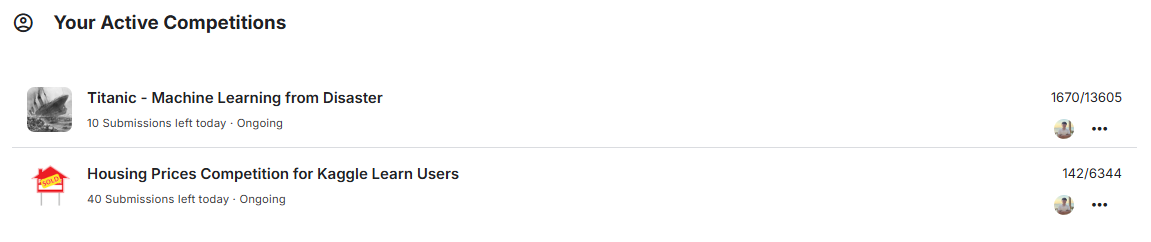

In [1]:
%pip install pillow requests


from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

# Google Drive direct link
image_url = "https://drive.google.com/uc?id=15iu3hZfE-ORw4Ljbcp846kQJt4xvFHt3"

# Fetch image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Display image
display(img)


# Download and Import

In [1]:
%pip install gdown pandas numpy matplotlib scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gdown
import zipfile
import sys
import os
import platform
import re
from tqdm import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.datasets import make_regression # i use this here to test the model
from itertools import product  


In [3]:
# Python environment details
print("Python executable being used:", sys.executable)
print("Python version:", sys.version)

# Operating System details
print("Operating System:", platform.system())
print("OS Version:", platform.version())
print("OS Release:", platform.release())

# Machine and architecture details
print("Machine:", platform.machine())

# Visual Studio Code details (based on environment variable)
vscode_info = os.environ.get('VSCODE_PID', None)
if vscode_info:
    print("Running in Visual Studio Code")
else:
    print("Not running in Visual Studio Code")

Python executable being used: /usr/bin/python3
Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Operating System: Linux
OS Version: #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
OS Release: 6.6.56+
Machine: x86_64
Not running in Visual Studio Code


In [4]:
tqdm.pandas(desc="Processing text")

# Loading, Storing and Visualizing the data

This following cell will be run when using kaggle

In [5]:
if not vscode_info:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


This following cell will be run when local in vscode

In [6]:
# https://drive.google.com/file/d/19tQZiViPNrrh9Y9Ne1IHViHZEC8B5Nkg/view?usp=sharing
if vscode_info:
    # Define the destination directory
    output_dir = "Data"  # Change this to your desired directory

    # Ensure the directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Download the file
    url = "https://drive.google.com/uc?id=19tQZiViPNrrh9Y9Ne1IHViHZEC8B5Nkg"
    output_zip = "home-data-for-ml-course.zip"
    gdown.download(url, output_zip, quiet=False)

    # Extract all contents to the specified directory
    with zipfile.ZipFile(output_zip, "r") as zip_ref:
        zip_ref.extractall(output_dir)

    print(f"Files extracted to: {output_dir}")

In [7]:
# Load dataset
if vscode_info:
    file_path_train = "data/train.csv"  
    file_path_test = "data/test.csv"  
else:
    file_path_train = "/kaggle/input/home-data-for-ml-course/train.csv"  
    file_path_test = "/kaggle/input/home-data-for-ml-course/test.csv"  

train = pd.read_csv(file_path_train, index_col=0)
test = pd.read_csv(file_path_test, index_col=0)

print("train: ", train.shape)
print("test: ", test.shape)
train.head()

train:  (1460, 80)
test:  (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

isolate both the numerical and categorical columns 

In [10]:
numeric_ = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
numeric_.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [11]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_var = []
for i in numeric_.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

In [12]:
cat_train = X.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = X['MSSubClass']   #MSSubClass is nominal
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

For numerical features, we are always concerned about the distribution of these features, including the statistical characteristics of these columns e.g mean, median, mode. Hence we will usually use Distribution plot to visualize their data distribution. Boxplots are also commonly used to unearth the statistical characteristics of each feature.

<ipython-input-13-53d116a9ebc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_.loc[:,col].dropna(), kde=False)


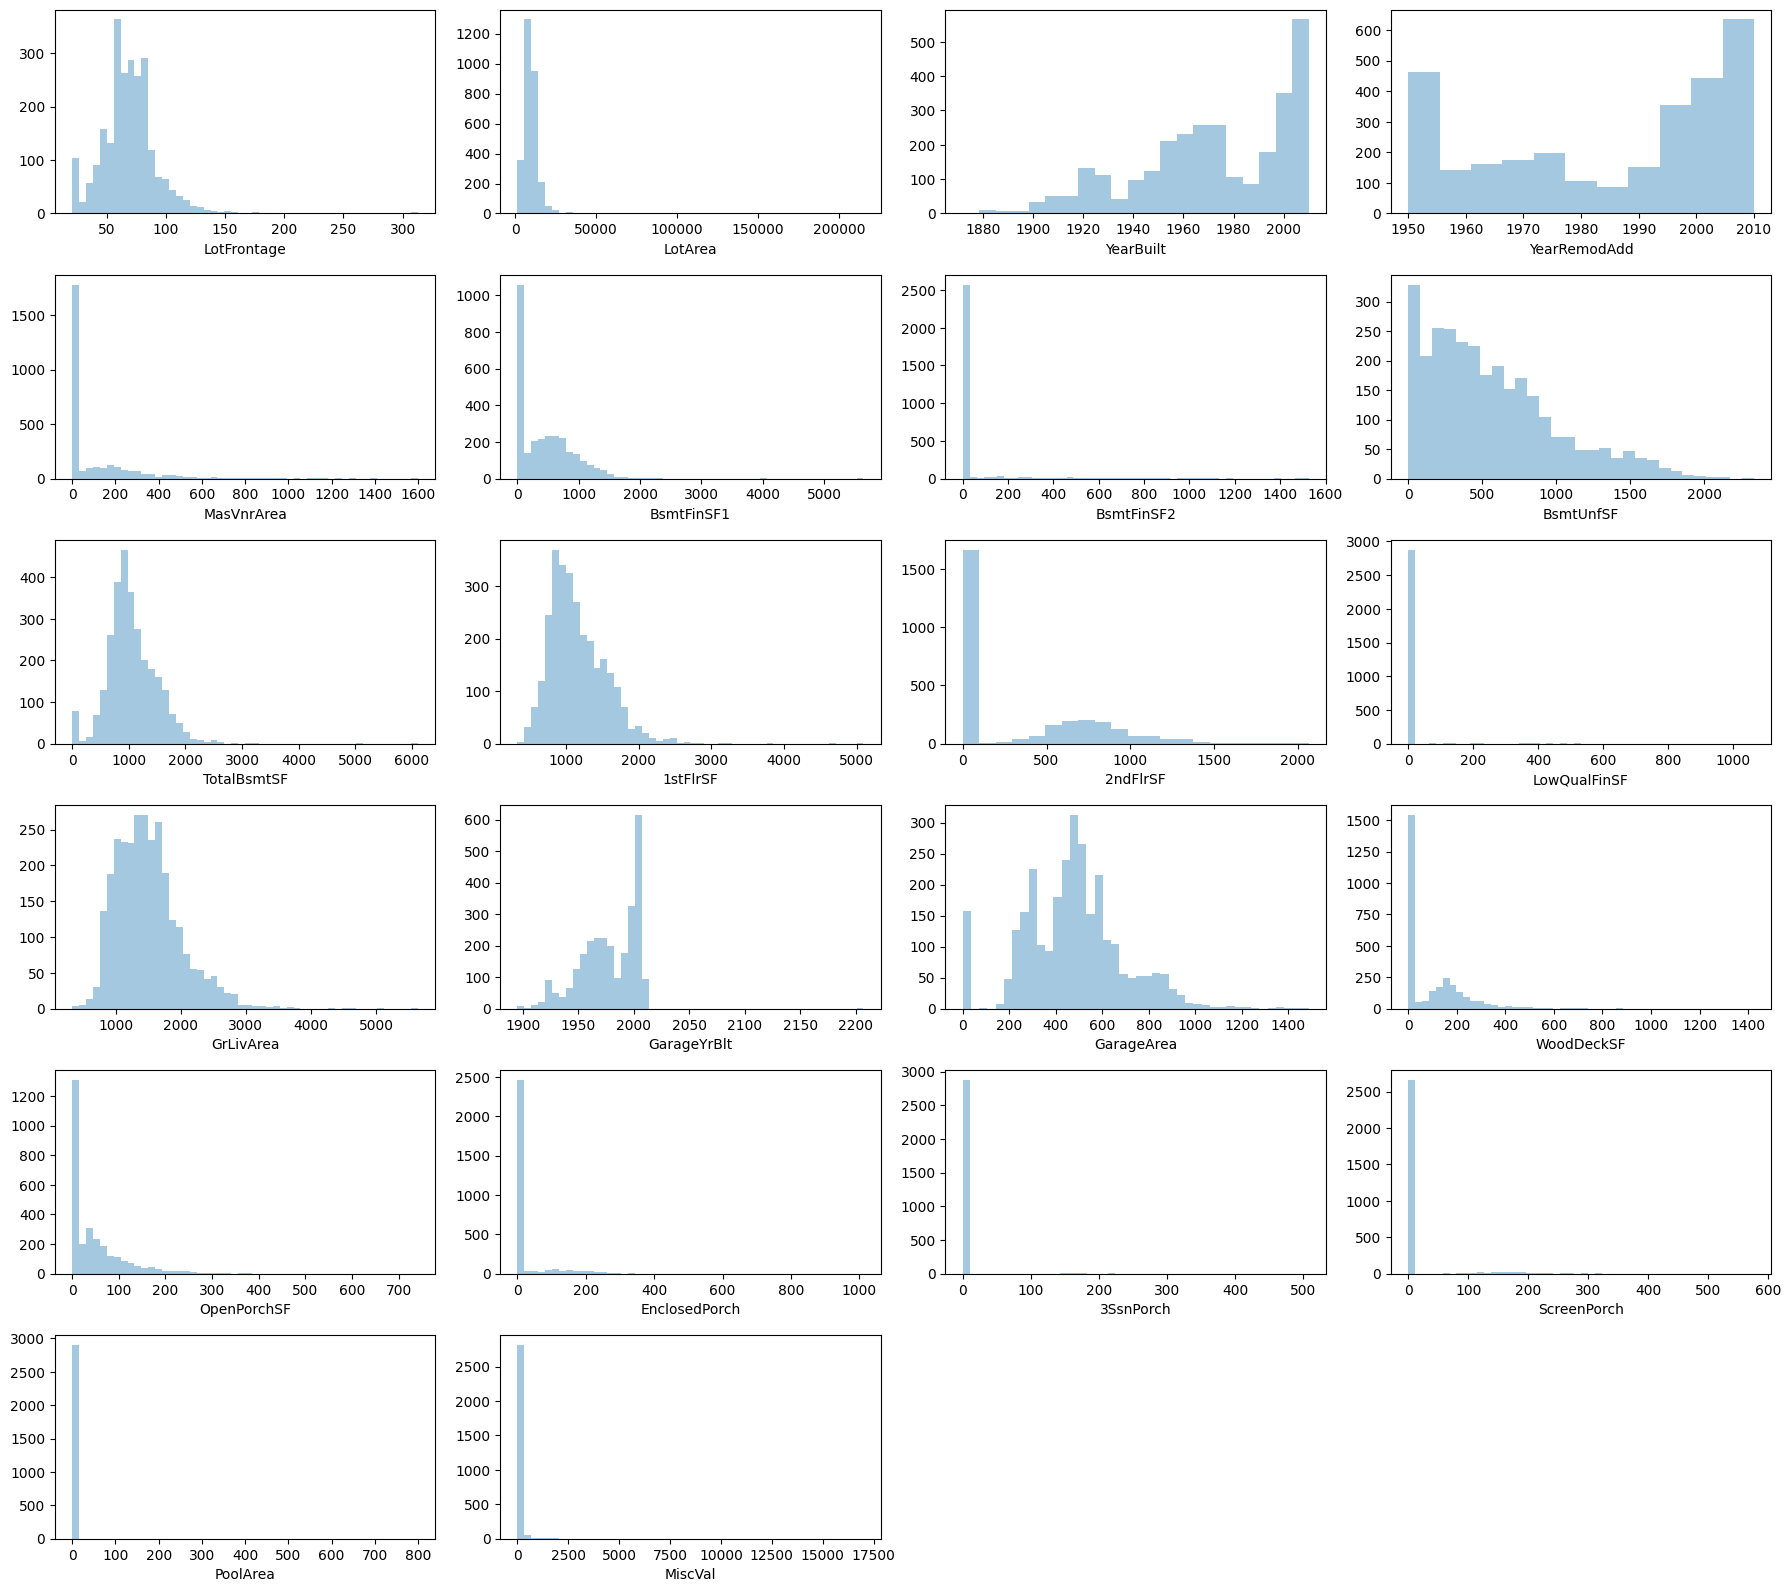

In [13]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

All these features are highly skewed, with mostly 0s. Having alot of 0s in the distribution doesnt really add information for predicting Housing Price. Hence, we will remove them during our preprocessing step

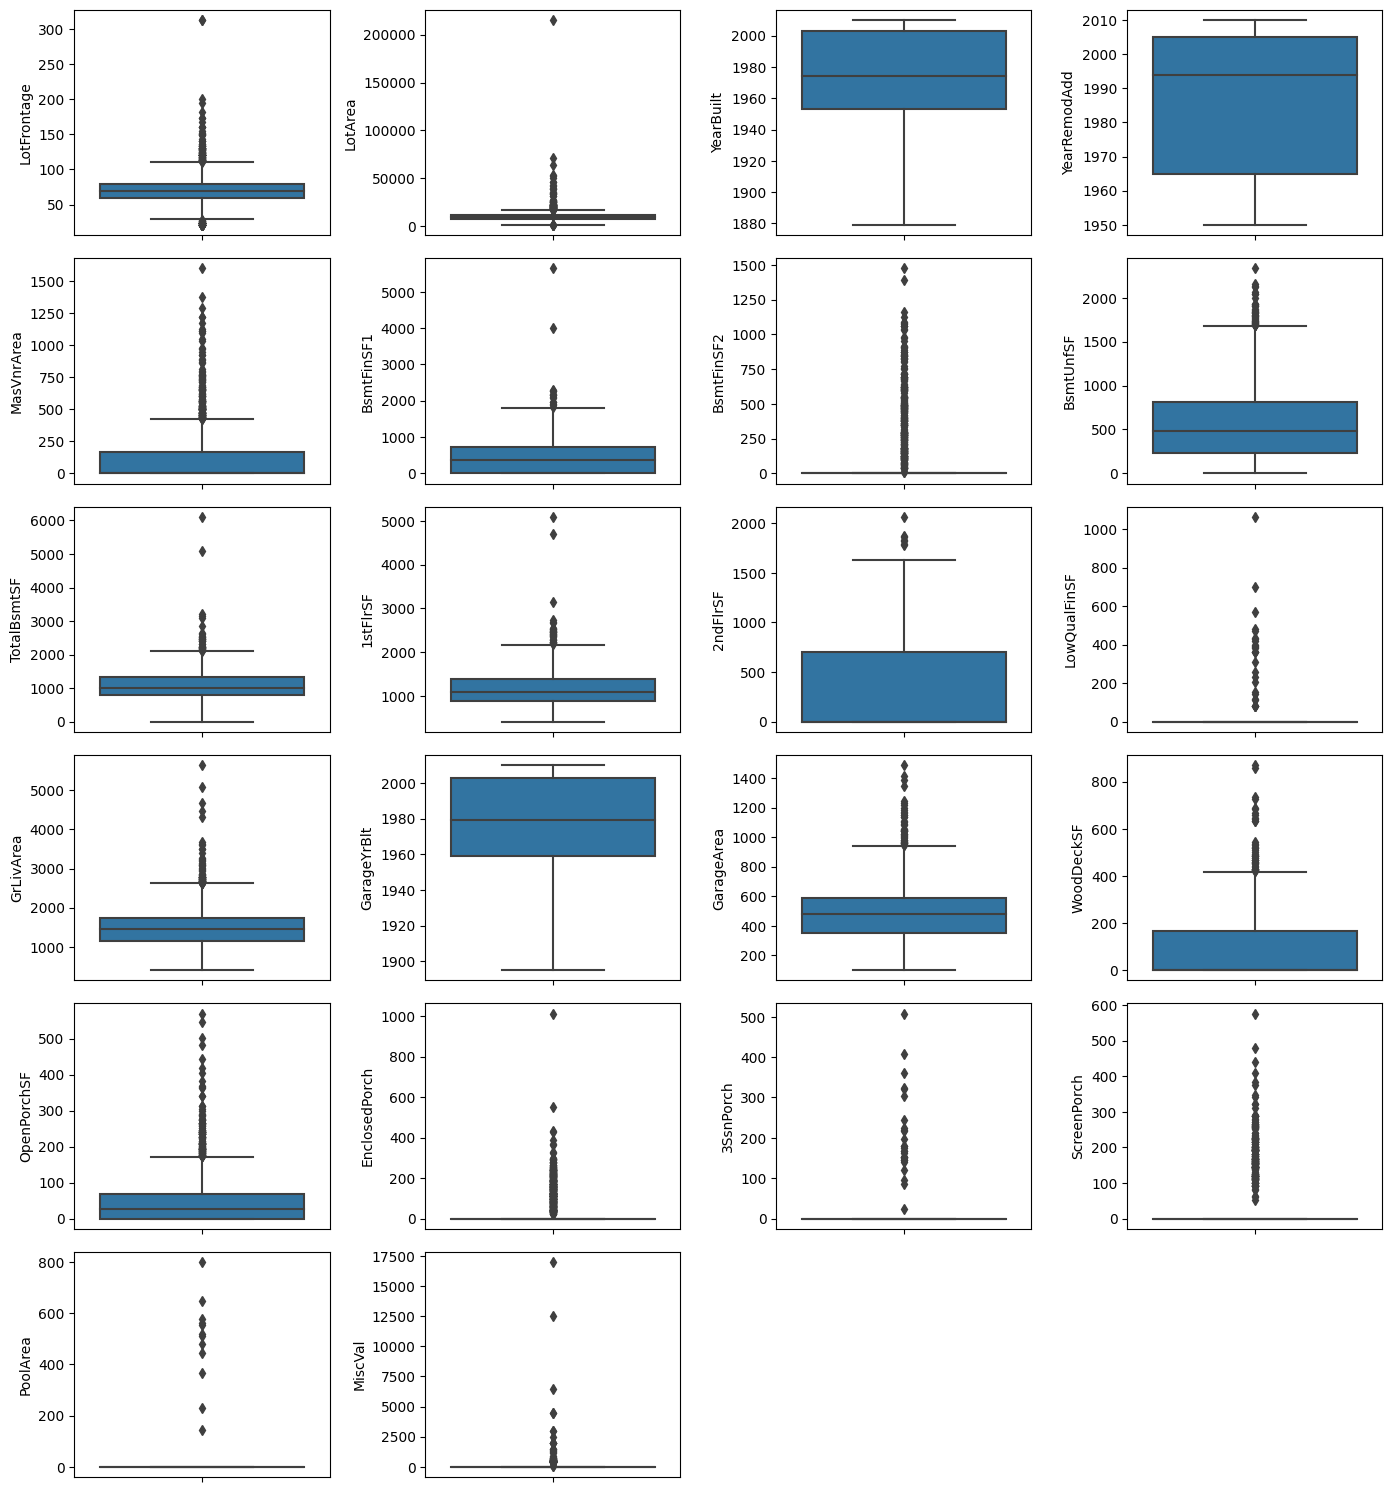

In [14]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

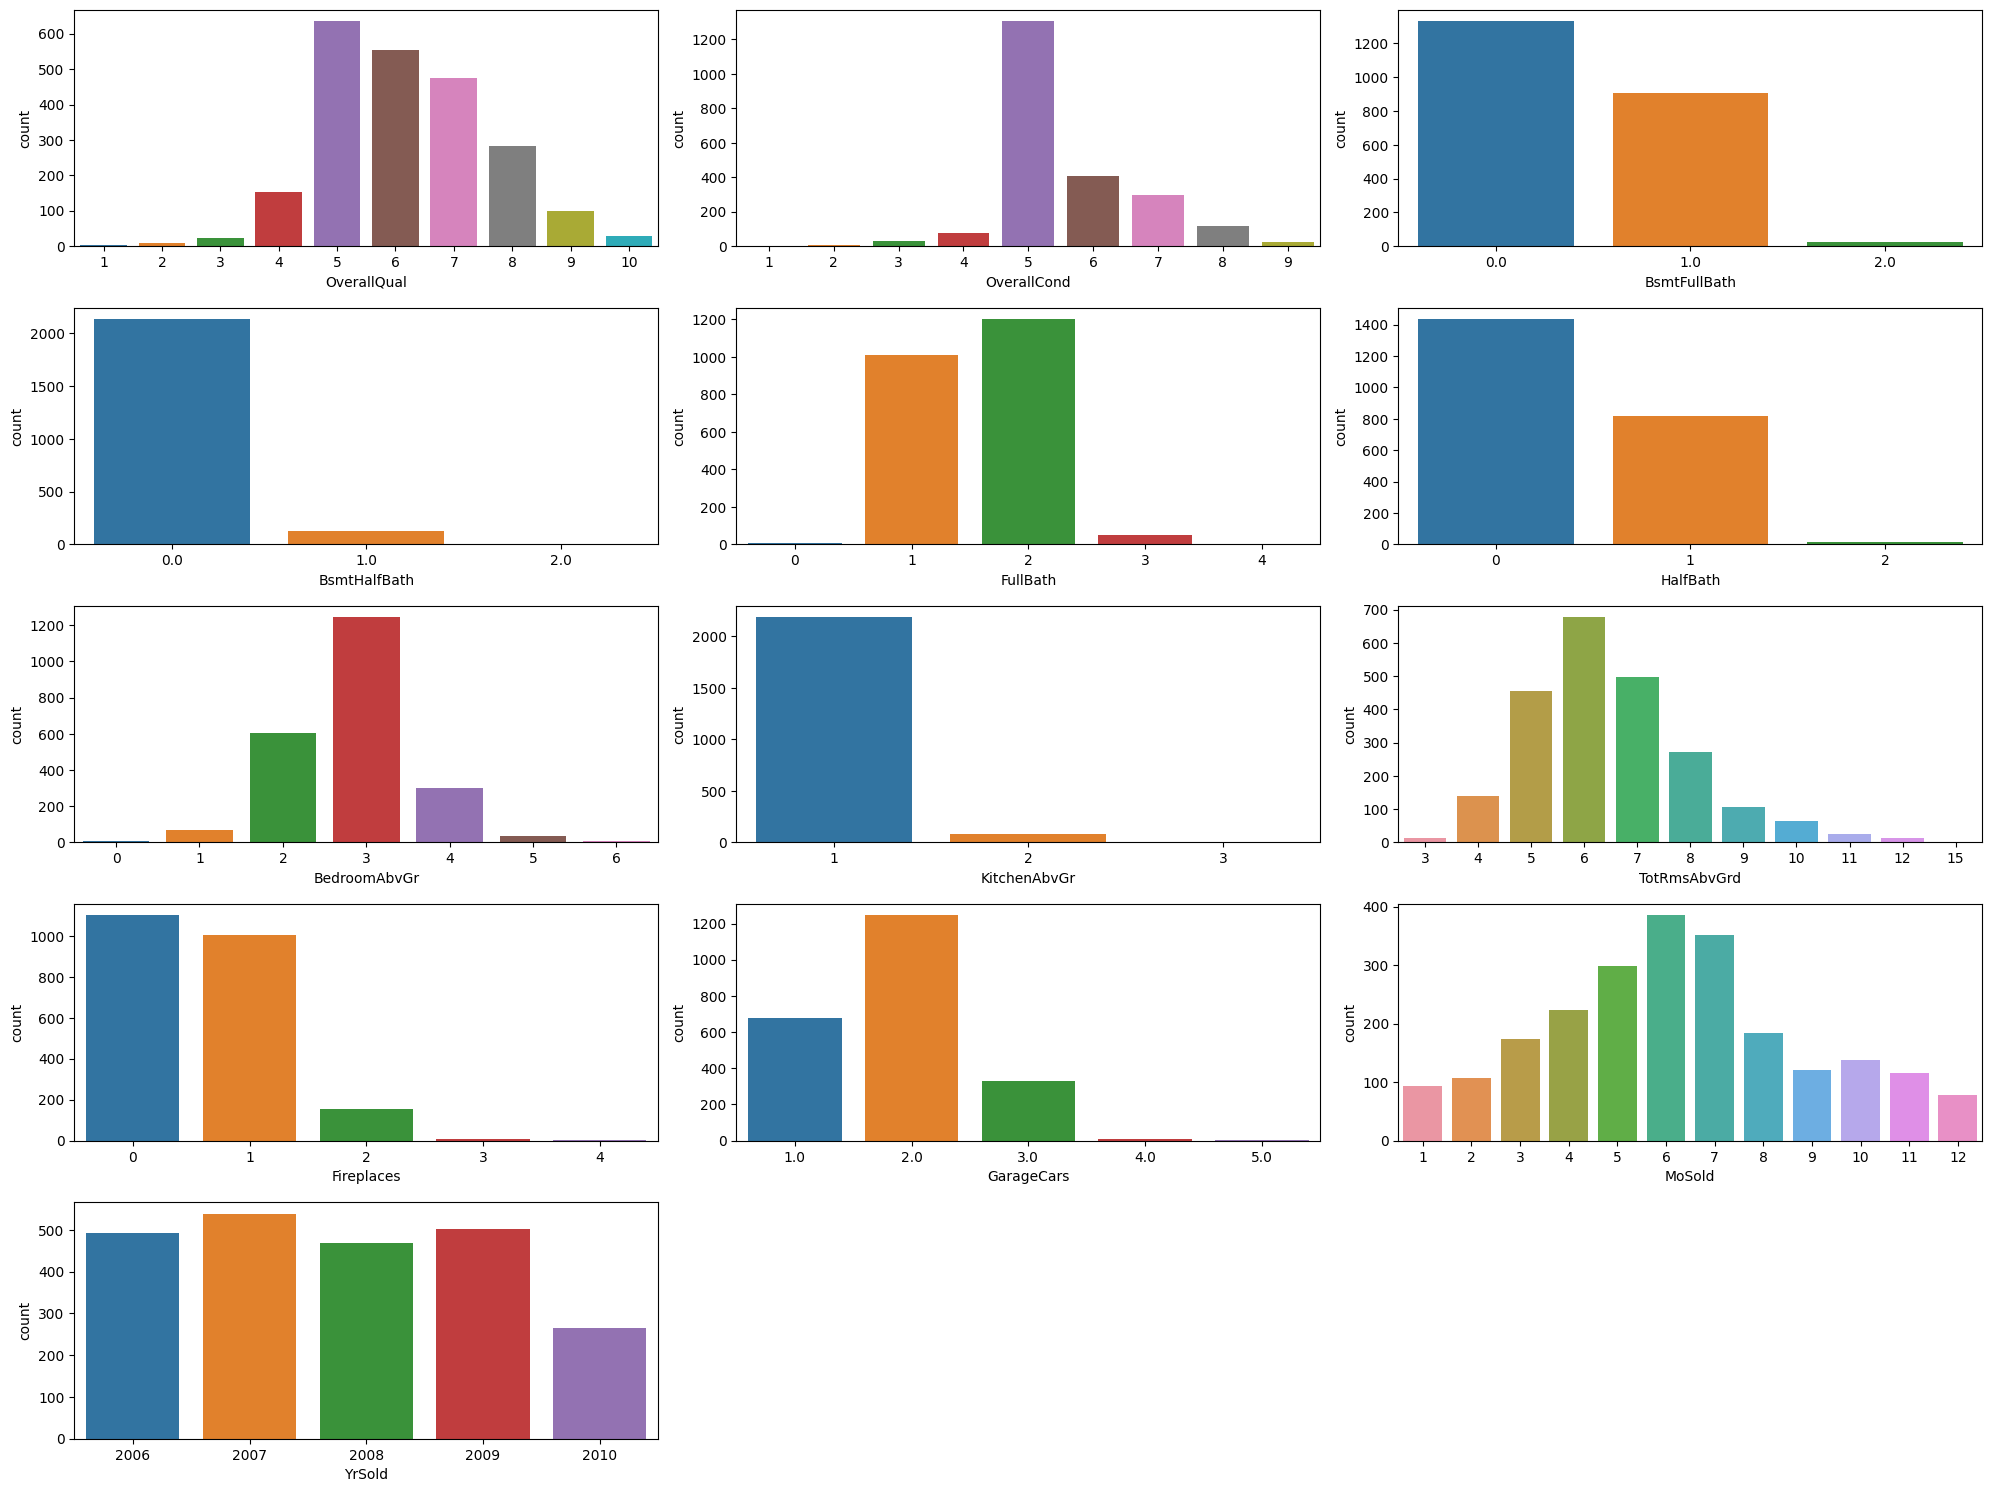

In [15]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

We can see that some categorical features like Utilities, Condition2 consist of mainly just one value, which does not add any useful information. Thus, we will also remove them later on.

<Axes: >

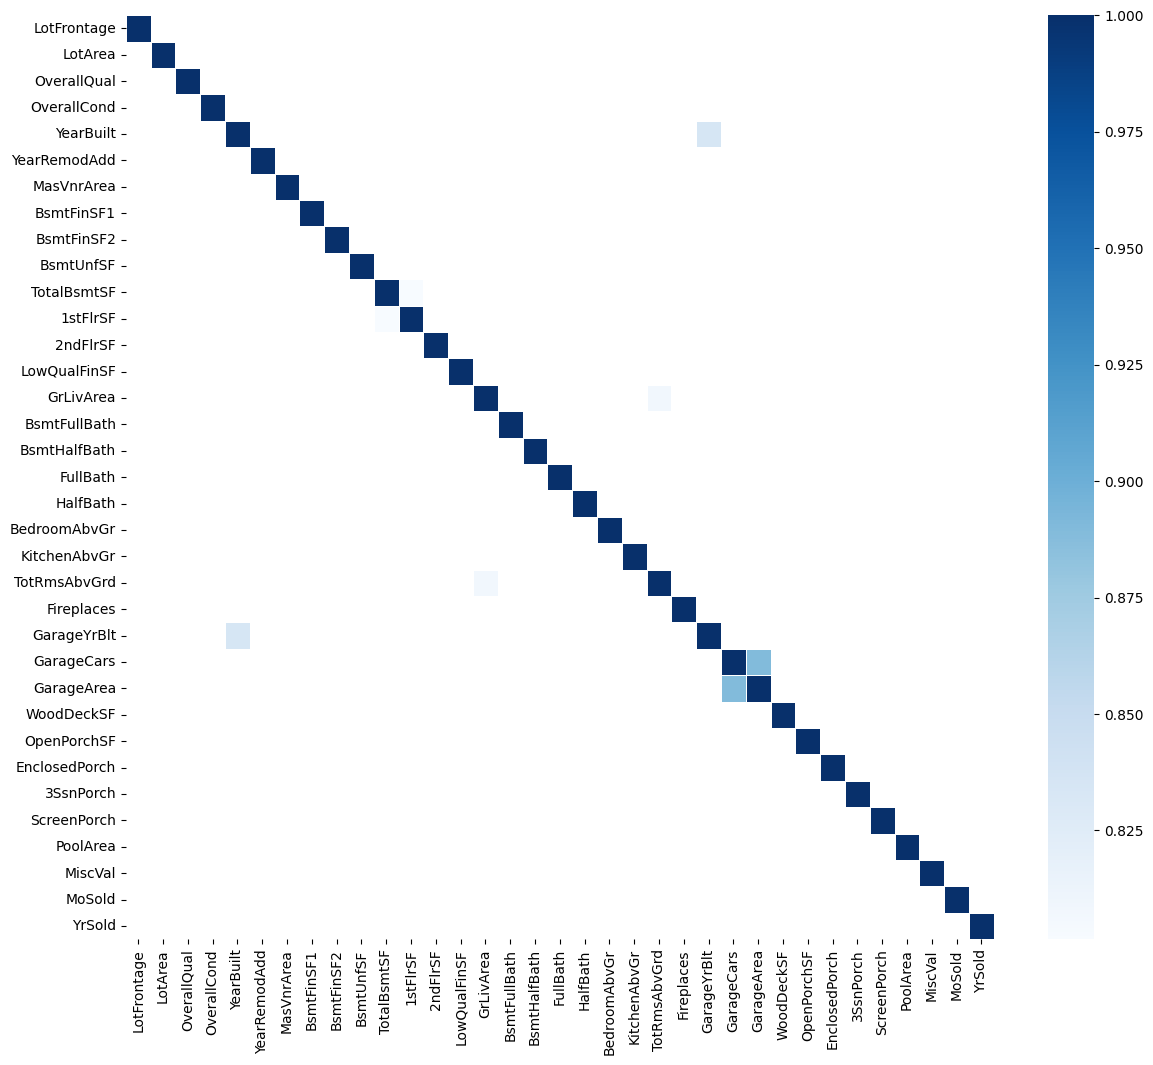

In [16]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

Highly Correlated variables:

- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea
- 1stFlrSF and TotalBsmtSF
- GarageArea and GarageCars

 we sorted the strength of linear relationship between Saleprice and other features. OverallQual and GrLivArea has the strongest linear relationship with SalePrice. 

In [17]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Using scatterplot can also help us to identify potential linear relationship between Numerical features.

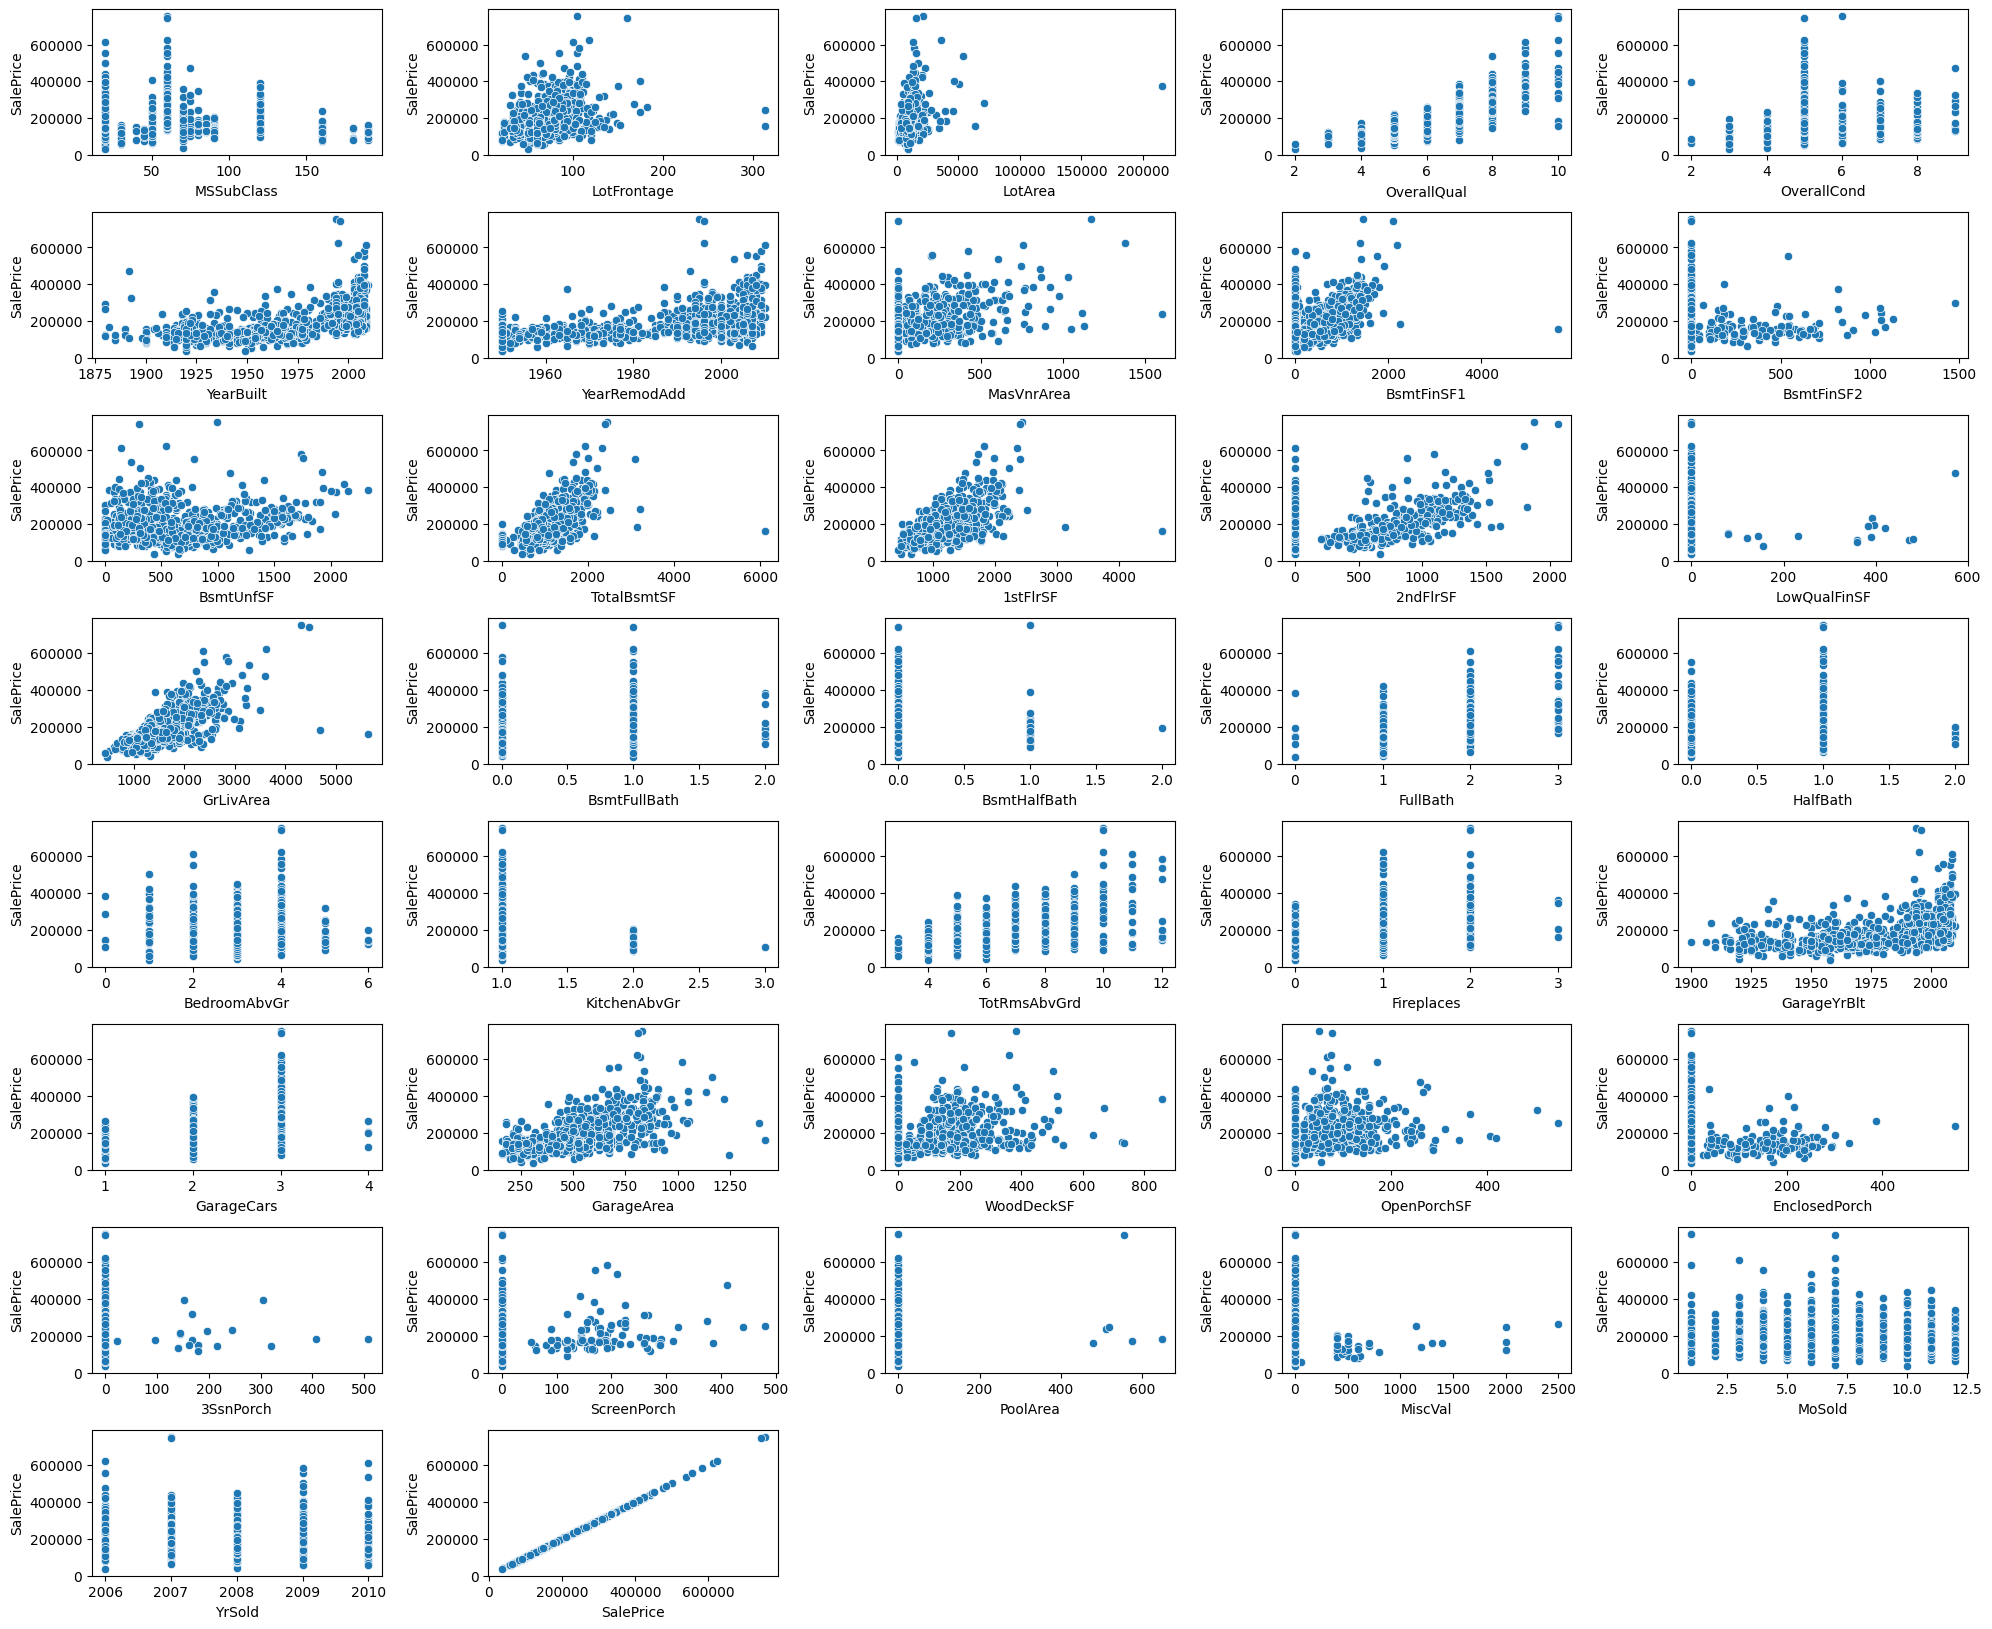

In [18]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

# Preprocessing

- Removing Redundant Features
- Dealing with Outliers
- Filling in missing values

From the above correlation matrix, We will remove the highly correlated features to avoid the problem of multicollinearity explained earlier

In [19]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

some features has much missing values

<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

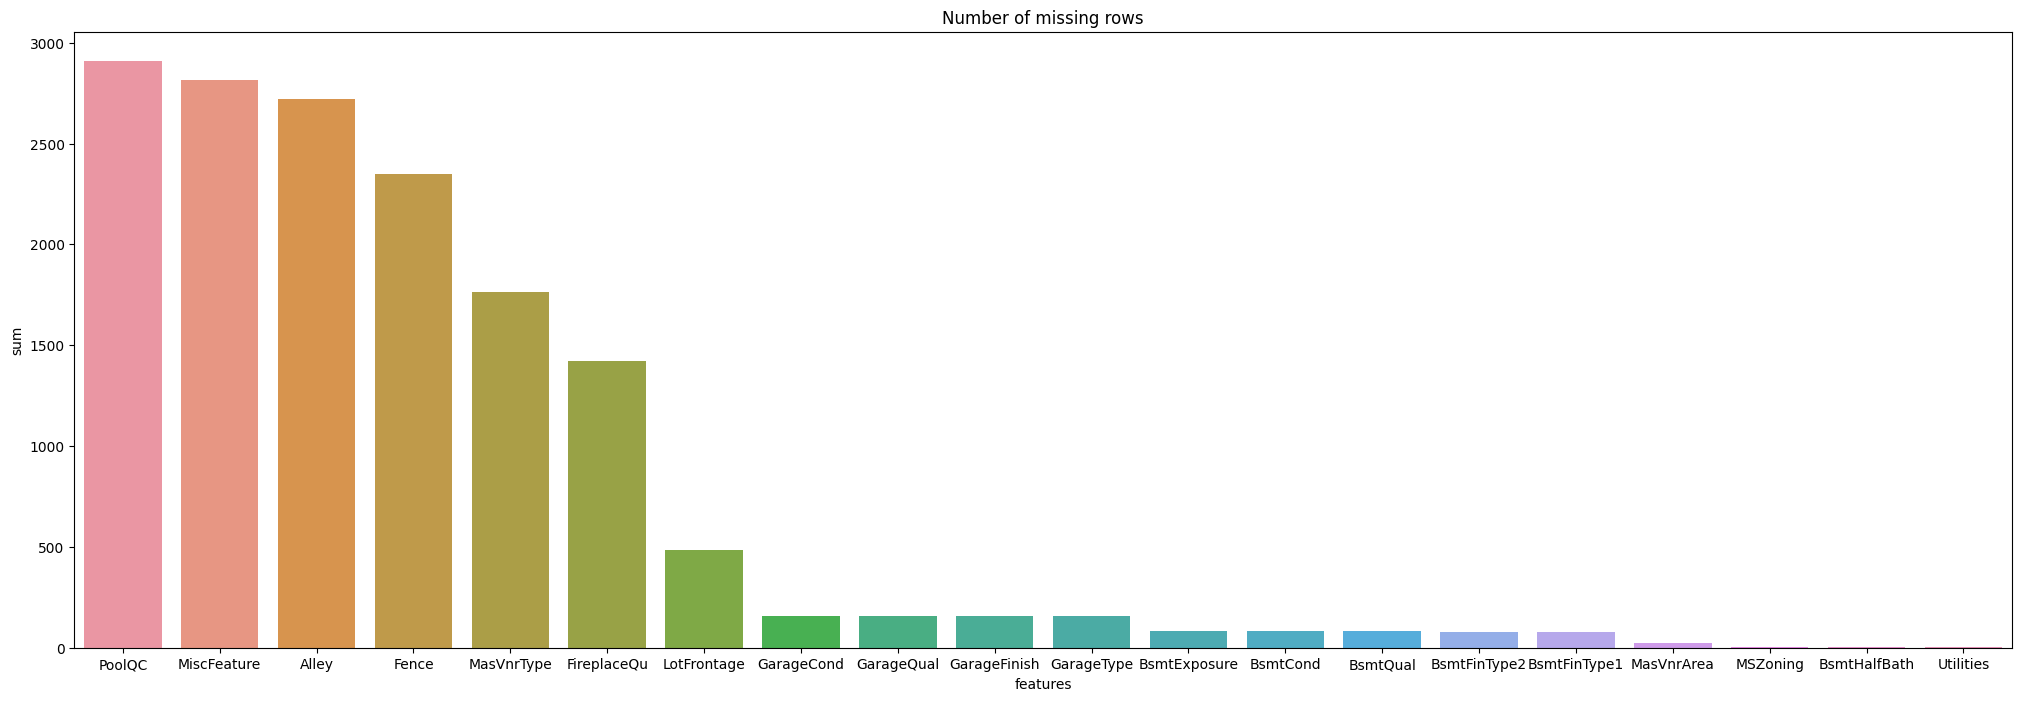

In [20]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [21]:
X.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

see from the plot below that the MoSold and YrSold does not have any impact on the price of the house sold.

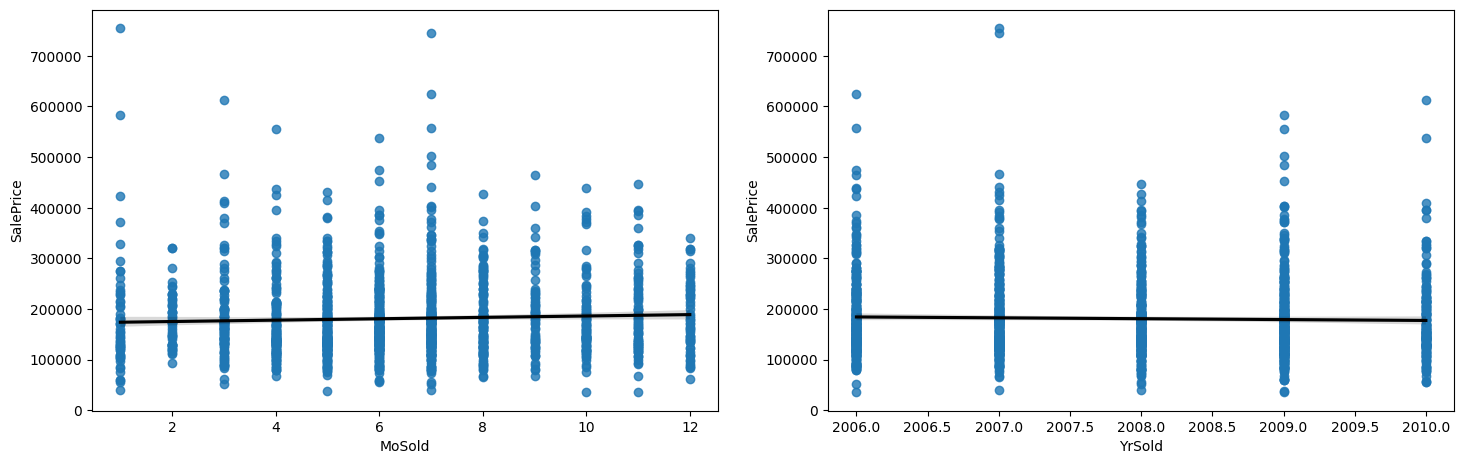

In [22]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax = axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax = axes[1],line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [23]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)

X.drop(['MoSold','YrSold'], axis=1, inplace=True)

some features mostly consist of just a single value or 0s, which is not useful 

We set a user defined threshold at 96%. If a column has more than 96% of the same value, we will render the features to be useless and remove it

In [24]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
X = X.drop(overfit_cat, axis=1)

In [25]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
X = X.drop(overfit_num, axis=1)

In [26]:
print("Categorical Features with >96% of the same value: ",overfit_cat)
print("Numerical Features with >96% of the same value: ",overfit_num)


Categorical Features with >96% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numerical Features with >96% of the same value:  ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


From our boxplot earlier, we have pinpointed the following features with extreme outliers:

- LotFrontage
- LotArea
- BsmtFinSF1
- TotalBsmtSF
- GrLivArea

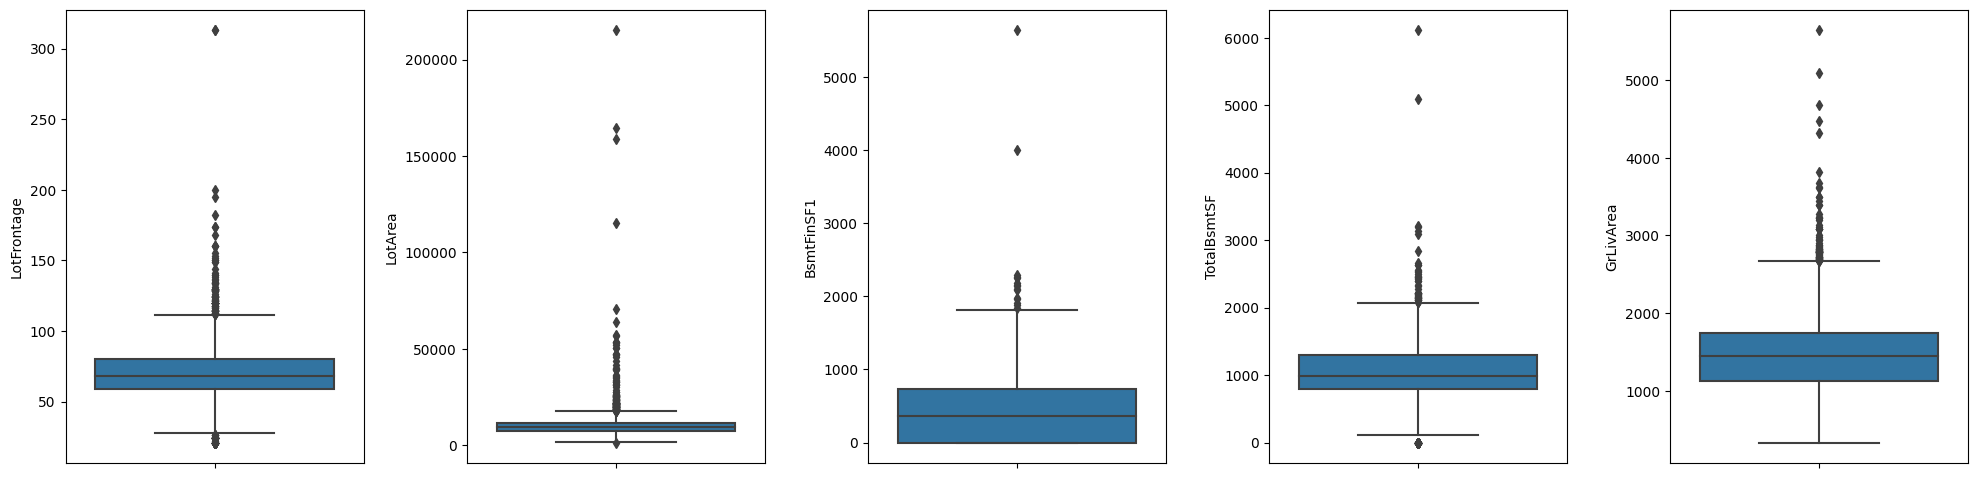

In [27]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=X)
fig.tight_layout(pad=1.5)

In [28]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [29]:
X.shape

(2919, 61)

Deadling with Missing vals

In [30]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

,sum
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageQual,159
GarageType,157
BsmtCond,82
BsmtExposure,82


In [31]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

X[cat] = X[cat].fillna("NA")

In [32]:
# Categorical columns to fill missing values
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]

# Apply mode imputation for missing categorical values within each neighborhood
X[cols] = X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


<ipython-input-32-c04fac746930>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[cols] = X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


In [33]:
print("Mean of LotFrontage: ", X['LotFrontage'].mean())
print("Mean of GarageArea: ", X['GarageArea'].mean())

Mean of LotFrontage:  69.30579531442663
Mean of GarageArea:  472.8745716244003


In [34]:
#for correlated relationship
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea'] = X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#numerical
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont] = X[cont].fillna(X[cont].mean())

In [35]:
X['MSSubClass'] = X['MSSubClass'].apply(str)

There are some columns which are ordinal by nature, which represents the quality or condition of certain housing features. In this case, we will map the respective strings to a value. The better the quality, the higher the value

In [36]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [37]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

# Feature Engineering

Feature Engineering is a technique by which we **create new features** that could potentially aid in predicting our target variable, which in this case, is SalePrice. In this notebook, we will create additional features based on our Domain Knowledge of the housing features

Based on the current feature we have, the first additional featuire we can add would be TotalLot, which sums up both the LotFrontage and LotArea to identify the total area of land available as lot. 

We can also calculate the total number of surface area of the house, TotalSF by adding the area from basement and 2nd floor. 

TotalBath can also be used to tell us in total how many bathrooms are there in the house. 

We can also add all the different types of porches around the house and generalise into a total porch area, TotalPorch.

- TotalLot = LotFrontage + LotArea
- TotalSF = TotalBsmtSF + 2ndFlrSF
- TotalBath = FullBath + HalfBath
- TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch
- TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

In [38]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

also include simple feature engineering by creating binary columns for some features that can indicate the presence(1) / absence(0) of some features of the house

In [39]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in colum:
    col_name = col+'_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)


Lastly, because machine learning only learns from data that is numerical in nature, we will convert the remaining categorical columns into one-hot features using the get_dummies() method into numerical columns that is suitable for feeding into our machine learning algorithm.

In [40]:
X = pd.get_dummies(X)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


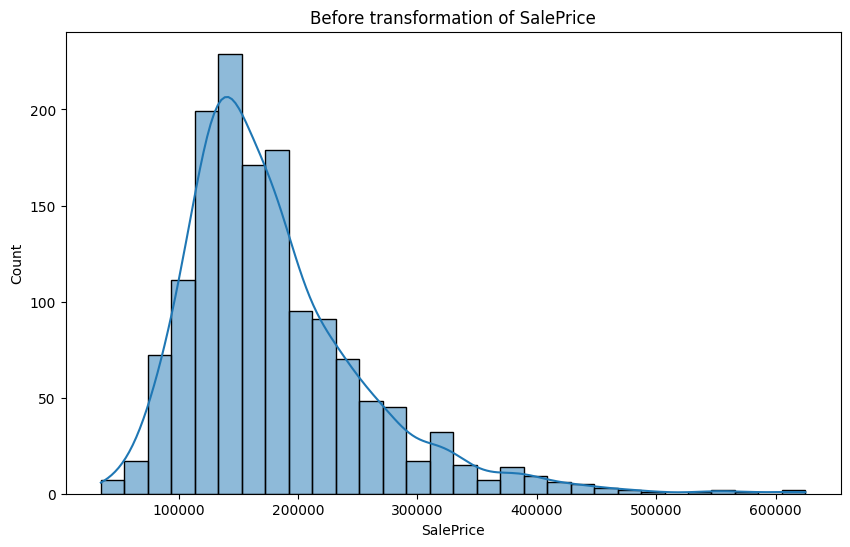

In [41]:
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
sns.histplot(train['SalePrice'], kde=True, bins=30) 
plt.show()

Distribution is skewed to the right, where the tail on the curve’s right-hand side is longer than the tail on the left-hand side, and the mean is greater than the mode. This situation is also called positive skewness.

Having a skewed target will affect the overall performance of our machine learning model, thus, one way to alleviate will be to **using log transformation** on skewed target, in our case, the SalePrice to reduce the skewness of the distribution.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


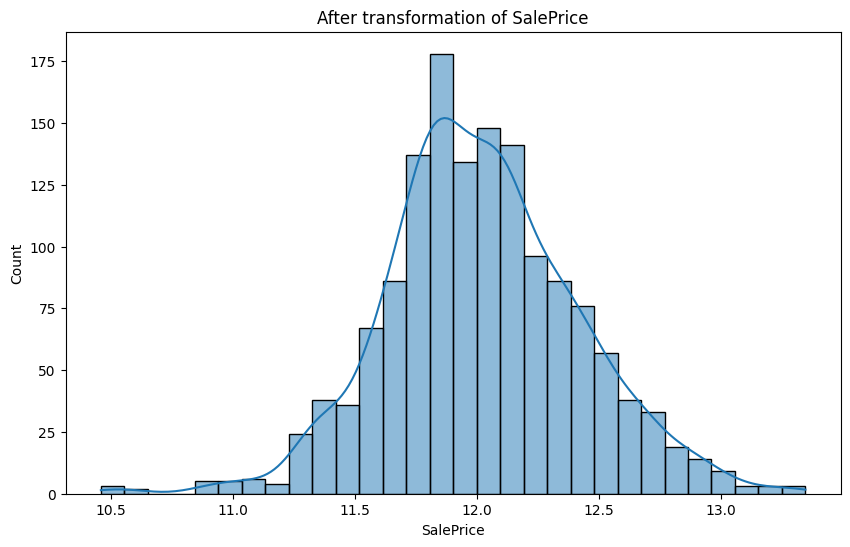

In [42]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
sns.histplot(np.log(train['SalePrice']), kde=True, bins=30)
plt.show()

In [43]:
y["SalePrice"] = np.log(y['SalePrice'])

# Building Funcs

## Understanding the Gradient Descent Formula in `LinearRegressionGD`

In the `fit` method of the **`LinearRegressionGD`** class, the gradient descent update rule is applied to optimize the **parameters (weights) `theta`** for linear regression.

---

### **1. Cost Function (Mean Squared Error - MSE)**
The cost function measures how well the model fits the data:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2
$$

where:
- $ m $ = number of training examples
- $ h_{\theta}(x) $ = predicted value = $ X\theta $
- $ y $ = actual target values
- $ X $ = feature matrix
- $ \theta $ = model parameters (weights)

---

### **2. Gradient Calculation**
To minimize the cost function $ J(\theta) $, we compute the **gradient** (partial derivative of the cost function with respect to `theta`):

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (X\theta - y)
$$

where:
- $ X^T $ is the **transpose** of the feature matrix $ X $.
- $ X\theta - y $ is the **error vector** (difference between predicted and actual values).

This gradient tells us **how to adjust `theta`** to minimize the cost function.

---

### **3. Gradient Descent Update Rule**
Using the computed gradient, we update the model parameters (`theta`) using the gradient descent rule:

$$
\theta := \theta - \alpha \cdot \frac{1}{m} X^T (X\theta - y)
$$

where:
- $ \alpha $ is the **learning rate** (step size).
- $ \frac{1}{m} X^T (X\theta - y) $ is the **gradient**.

The learning rate $ \alpha $ controls **how big of a step** we take towards the optimal solution in each iteration.

---


In [44]:
class LinearRegressionGD:
    """
    A simple implementation of Linear Regression using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating the model parameters (theta).
    
    iterations : int, default=1000
        The number of iterations to perform in the gradient descent optimization.

    gradient_type : str, default="batch"
        The type of gradient descent to use:
        - "batch" for Batch Gradient Descent
        - "stochastic" for Stochastic Gradient Descent (SGD)
        - "mini-batch" for Mini-Batch Gradient Descent

    batch_size : int, optional (only used for mini-batch), default=32
        The batch size to use for Mini-Batch Gradient Descent.
    """

    def __init__(self, gradient_type="batch", learning_rate=0.01, iterations=1000, batch_size=32):
        """
        Initializes the Linear Regression model with gradient descent.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.gradient_type = gradient_type.lower()  # Ensure lowercase
        self.batch_size = batch_size if self.gradient_type == "mini-batch" else None
        self.theta = None  # Model parameters
        self.training_loss = []

    def fit(self, X, y):
        """
        Trains the linear regression model using the selected gradient descent method.
        """
        m, n = X.shape
        self.training_loss = []
        self.theta = np.zeros((n, 1))  # Initialize parameters with zeros

        if self.gradient_type == "batch":
            self._batch_gradient_descent(X, y, m)
        elif self.gradient_type == "stochastic":
            self._stochastic_gradient_descent(X, y, m)
        elif self.gradient_type == "mini-batch":
            self._mini_batch_gradient_descent(X, y, m)
        else:
            raise ValueError("Invalid gradient_type. Choose 'batch', 'stochastic', or 'mini-batch'.")

    def _batch_gradient_descent(self, X, y, m):
        """ Performs Batch Gradient Descent (updates after all samples). """
        for i in range(self.iterations):
            gradient = (1/m) * X.T @ (X @ self.theta - y)
            self.theta -= self.learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X @ self.theta - y) ** 2)
            self.training_loss.append(cost)

    def _stochastic_gradient_descent(self, X, y, m):
        """ Performs Stochastic Gradient Descent (updates per sample). """
        for i in range(self.iterations):
            for j in range(m):
                random_index = np.random.randint(m)
                X_sample = X[random_index, :].reshape(1, -1)
                y_sample = y[random_index].reshape(-1, 1)
                gradient = X_sample.T @ (X_sample @ self.theta - y_sample)
                self.theta -= self.learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X @ self.theta - y) ** 2)
            self.training_loss.append(cost)

    def _mini_batch_gradient_descent(self, X, y, m):
        """ Performs Mini-Batch Gradient Descent (updates per batch). """
        batch_size = self.batch_size or 32  # Default batch size
        for i in range(self.iterations):
            indices = np.random.permutation(m)
            X_shuffled, y_shuffled = X[indices], y[indices]
            for j in range(0, m, batch_size):
                X_batch = X_shuffled[j:j+batch_size]
                y_batch = y_shuffled[j:j+batch_size]
                gradient = (1/len(X_batch)) * X_batch.T @ (X_batch @ self.theta - y_batch)
                self.theta -= self.learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X @ self.theta - y) ** 2)
            self.training_loss.append(cost)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        """
        return X @ self.theta
    
    def get_training_loss(self):
        """
        Returns the recorded training loss during gradient descent.
        """
        return self.training_loss


## Linear Regression with Adam Optimization
This model implements **Linear Regression** using **Adam optimization**, a powerful variant of gradient descent.

### **How It Works**
Adam combines:
- **Momentum (β1):** Smooths updates using an exponentially moving average of gradients.
- **Adaptive Learning Rate (β2):** Adjusts the learning rate for each parameter.

### **Update Rule**
At each step:
1. Compute the **gradient** of the cost function:
   $$
   g_t = \frac{1}{m} X^T (X\theta - y)
   $$

2. Update the **first moment estimate (momentum)**:
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
   $$

3. Update the **second moment estimate (RMS scaling)**:
   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
   $$

4. Apply **bias correction**:
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$

5. Update parameters:
   $$
   \theta := \theta - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$



In [45]:
class LinearRegressionAdam:
    """
    A Linear Regression model using the Adam optimization algorithm.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating model parameters.
    
    iterations : int, default=1000
        Number of optimization iterations.
    
    beta1 : float, default=0.9
        Exponential decay rate for the first moment estimate (m).
    
    beta2 : float, default=0.999
        Exponential decay rate for the second moment estimate (v).
    
    epsilon : float, default=1e-8
        A small constant to prevent division by zero.
    """
    def __init__(self, learning_rate=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Initializes the Linear Regression model with Adam optimizer.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.theta = None
        self.training_loss = []
    
    def fit(self, X, y):
        """
        Trains the linear regression model using Adam optimization.
        Updates:
        --------
        - Optimizes `self.theta` (model parameters) using Adam.
        - Prints cost every 100 iterations.
        """
        self.training_loss = []
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        m_t, v_t = np.zeros((n, 1)), np.zeros((n, 1))

        for i in range(1, self.iterations + 1):
            gradient = (1/m) * X.T @ (X @ self.theta - y)

            m_t = self.beta1 * m_t + (1 - self.beta1) * gradient
            v_t = self.beta2 * v_t + (1 - self.beta2) * (gradient ** 2)

            m_t_hat = m_t / (1 - self.beta1 ** i)
            v_t_hat = v_t / (1 - self.beta2 ** i)

            self.theta -= self.learning_rate * m_t_hat / (np.sqrt(v_t_hat) + self.epsilon)

            cost = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            self.training_loss.append(cost)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        Returns:
        --------
        np.ndarray, shape (m, 1)
            Predicted values.
        """
        return X @ self.theta
    
    def get_training_loss(self):
        """
        Returns the recorded training loss during gradient descent.
        """
        return self.training_loss 


## Lasso Regression (L1 Regularization)
Lasso Regression applies **L1 regularization** to reduce model complexity and encourage **sparse feature selection** by shrinking some coefficients to exactly **zero**.

### **Mathematical Formulation**
The **cost function** for Lasso Regression:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$$

where:
- $ \frac{1}{2m} \sum (h_{\theta}(x) - y)^2 $ is the **Mean Squared Error (MSE)**.
- $ \lambda \sum |\theta_j| $ is the **L1 regularization term**.
- $ \lambda $ controls the amount of regularization.

### **Key Features**
✅ **Feature Selection** – Some coefficients become exactly **zero**, removing irrelevant features.  
✅ **Robust to Collinearity** – Helps when features are highly correlated.  
✅ **Sparse Models** – Reduces complexity, improves interpretability.  

### **Optimization (Subgradient Descent)**
Since **L1 norm is not differentiable at zero**, we use **subgradient descent**:

$$
\theta := \theta - \alpha \left( \frac{1}{m} X^T (X\theta - y) + \lambda \cdot \text{sign}(\theta) \right)
$$



In [46]:
class LassoRegression:
    """
    Lasso Regression (L1 Regularization) using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating the model parameters.

    iterations : int, default=1000
        Number of iterations for gradient descent.

    lambda_ : float, default=0.1
        Regularization strength. Higher values result in more sparsity.

    Attributes:
    -----------
    theta : np.ndarray
        The learned model parameters.

    training_loss : list
        Stores the loss values (Mean Squared Error + L1 penalty) at each iteration.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None
        self.training_loss = []

    def fit(self, X, y):
        """
        Trains the Lasso Regression model using gradient descent.
        Updates:
        --------
        - Optimizes `self.theta` using L1 regularized gradient descent.
        - Records loss at each iteration.
        """
        self.training_loss = []
        m, n = X.shape
        self.theta = np.zeros((n, 1))

        for i in range(self.iterations):
            # Compute gradient (Lasso uses subgradient for L1)
            gradient = (1/m) * X.T @ (X @ self.theta - y) + self.lambda_ * np.sign(self.theta)

            # Update theta using gradient descent
            self.theta -= self.learning_rate * gradient

            # Compute cost (Mean Squared Error + L1 penalty)
            mse_loss = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            l1_penalty = self.lambda_ * np.sum(np.abs(self.theta))
            total_loss = mse_loss + l1_penalty
            self.training_loss.append(total_loss)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        Returns:
        --------
        np.ndarray, shape (m, 1)
            Predicted values.
        """
        return X @ self.theta

    def get_training_loss(self):
        """
        Returns the recorded training loss.
        """
        return self.training_loss


## **Ridge Regression (L2 Regularization)**
Ridge Regression applies **L2 regularization** to prevent overfitting by **shrinking** model parameters without forcing them to zero.

### **Mathematical Formulation**
The **cost function** for Ridge Regression:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2 + \frac{\lambda}{2} \sum_{j=1}^{n} \theta_j^2
$$

where:
- $ \frac{1}{2m} \sum (h_{\theta}(x) - y)^2 $ is the **Mean Squared Error (MSE)**.
- $ \frac{\lambda}{2} \sum \theta_j^2 $ is the **L2 regularization term**.
- $ \lambda $ controls the amount of regularization.

### **Key Features**
✅ **Prevents Overfitting** – Shrinks large coefficients, making the model more **stable**.  
✅ **Handles Multicollinearity** – Helps when features are **highly correlated**.  
✅ **Does Not Eliminate Features** – Unlike Lasso, Ridge keeps **all features** but reduces their impact.  

### **Optimization (Gradient Descent)**
To minimize the cost function, we apply **L2 regularized gradient descent**:

$$
\theta := \theta - \alpha \left( \frac{1}{m} X^T (X\theta - y) + \lambda \theta \right)
$$


In [47]:
class RidgeRegression:
    """
    Ridge Regression (L2 Regularization) using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating the model parameters.

    iterations : int, default=1000
        Number of iterations for gradient descent.

    lambda_ : float, default=0.1
        Regularization strength. Higher values result in more shrinkage.

    Attributes:
    -----------
    theta : np.ndarray
        The learned model parameters.

    training_loss : list
        Stores the loss values (Mean Squared Error + L2 penalty) at each iteration.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None
        self.training_loss = []

    def fit(self, X, y):
        """
        Trains the Ridge Regression model using gradient descent.
        Updates:
        --------
        - Optimizes `self.theta` using L2 regularized gradient descent.
        - Records loss at each iteration.
        """
        self.training_loss = []
        m, n = X.shape
        self.theta = np.zeros((n, 1))

        for i in range(self.iterations):
            # Compute gradient (L2 regularization)
            gradient = (1/m) * X.T @ (X @ self.theta - y) + self.lambda_ * self.theta

            # Update theta using gradient descent
            self.theta -= self.learning_rate * gradient

            # Compute cost (Mean Squared Error + L2 penalty)
            mse_loss = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            l2_penalty = (self.lambda_ / 2) * np.sum(self.theta ** 2)
            total_loss = mse_loss + l2_penalty
            self.training_loss.append(total_loss)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        Returns:
        --------
        np.ndarray, shape (m, 1)
            Predicted values.
        """
        return X @ self.theta

    def get_training_loss(self):
        """
        Returns the recorded training loss.
        Returns:
        --------
        list
            Training loss at each iteration.
        """
        return self.training_loss


In [48]:
# # Generate synthetic regression data
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=10, random_state=42)

# # Split data into training and validation sets
# X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# # Initialize models
# models = {
#     "Gradient Descent": LinearRegressionGD(learning_rate=0.01, iterations=1000),
#     "Adam Optimization": LinearRegressionAdam(learning_rate=0.01, iterations=1000),
#     "Lasso Regression": LassoRegression(learning_rate=0.01, iterations=1000, lambda_=0.1),
#     "Ridge Regression": RidgeRegression(learning_rate=0.01, iterations=1000, lambda_=0.1)
# }

# # Train models and store training losses
# training_losses = {}
# predictions = {}

# for name, model in models.items():
#     model.fit(X_fit, y_fit.reshape(-1, 1))
#     y_pred_train = model.predict(X_fit)
#     predictions[name] = y_pred_train
#     training_losses[name] = model.get_training_loss()


In [49]:
# # Create subplots for training loss
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# for ax, (name, loss) in zip(axs.flatten(), training_losses.items()):
#     ax.plot(loss, label="Training Loss", color="blue")
#     ax.set_title(f"{name} - Training Loss")
#     ax.set_xlabel("Iterations")
#     ax.set_ylabel("Loss (Cost)")
#     ax.legend()

# plt.tight_layout()
# plt.show()

In [50]:
# # Create subplots for predictions
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# for ax, (name, y_pred_train) in zip(axs.flatten(), predictions.items()):
#     ax.scatter(y_fit, y_pred_train, color="blue", s=5)
#     ax.plot([min(y_fit), max(y_fit)], [min(y_fit), max(y_fit)], color="red", linewidth=2)
#     ax.set_title(name)
#     ax.set_xlabel("True values")
#     ax.set_ylabel("Predicted train values")

# plt.tight_layout()
# plt.show()


# Training

In [51]:
def manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_val, y_val):
    """
    Performs hyperparameter tuning by iterating through a set of predefined parameter values.

    Parameters:
    -----------
    models : dict
        Dictionary containing model constructors.

    param_grid : dict
        Dictionary containing hyperparameter values to test, in the form:
        { "model_name": { "param_name": [values...] } }.

    X_train : np.ndarray
        Training feature matrix.

    y_train : np.ndarray
        Training target values.

    X_val : np.ndarray
        Validation feature matrix.

    y_val : np.ndarray
        Validation target values.

    Returns:
    --------
    best_models : dict
        Dictionary containing the best model instance for each model type.

    results_df : pd.DataFrame
        DataFrame summarizing the hyperparameter tuning results.
    """
    best_models = {}
    results = []

    for model_name, model_class in models.items():
        best_mse = float("inf")
        best_params = None
        best_model = None

        # Extract hyperparameter names and values for this model
        param_names = list(param_grid[model_name].keys())
        param_values = list(param_grid[model_name].values())

        # Generate all combinations of hyperparameter values
        for param_combination in product(*param_values):
            params = dict(zip(param_names, param_combination))  # Convert tuple to dictionary

            # Create model with given hyperparameters
            model = model_class(**params)
            model.fit(X_train, y_train.reshape(-1, 1))

            # Predict on validation set
            y_pred_val = model.predict(X_val)

            # Compute mean squared error (MSE) manually
            mse = np.mean((y_val - y_pred_val.flatten()) ** 2)

            # Store the result
            results.append({
                "Model": model_name,
                "Params": params,
                "MSE": mse
            })

            # Update best model if it achieves lower MSE
            if mse < best_mse:
                best_mse = mse
                best_params = params
                best_model = model

        # Store the best model
        best_models[model_name] = best_model
        print(f"Best model for {model_name}: {best_params} - MSE: {best_mse}")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return best_models, results_df


In [52]:
# Define parameter grid
param_grid = {
    "Gradient Descent": {
        "gradient_type": ["batch"],
        "learning_rate": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        "iterations": [10000]
    },
    "Gradient Descent MiniBatch": {
        "gradient_type": ["mini-batch"],
        "batch_size": [32, 64, 128, 256],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000]
    },
    "Adam Optimization": {
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000],
        "beta1": [0.001, 0.01, 0.1],
        "beta2": [0.001, 0.01, 0.1],
        "epsilon": [1e-8]
    },
    "Lasso Regression": {
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000],
        "lambda_": [0.0001, 0.001, 0.01, 0.1, 1]
    },
    "Ridge Regression": {
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000],
        "lambda_": [0.0001, 0.001, 0.01, 0.1, 1]
    }
}

# Define models (mapping to class constructors)
models = {
    "Gradient Descent": LinearRegressionGD,
    "Gradient Descent MiniBatch": LinearRegressionGD,
    "Adam Optimization": LinearRegressionAdam,
    "Lasso Regression": LassoRegression,
    "Ridge Regression": RidgeRegression
}


## Scaling

RobustScaler is a transformation technique that removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). It is also robust to outliers, which makes it ideal for data where there are too many outliers that will drastically reduce the number of training data.

In [53]:
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]

In [54]:
cols = x.select_dtypes(np.number).columns
transformer = StandardScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

In [55]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Val data shape:", X_val.shape)
print("Label train shape:", y_train.shape)
print("Label val shape:", y_val.shape)

# Convert to NumPy arrays
X_train, X_val = X_train.values, X_val.values
y_train, y_val = y_train.values.reshape(-1, 1), y_val.values.reshape(-1, 1)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

# Add bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]

print(X_train.shape, X_val.shape)


Train data shape: (1160, 222)
Val data shape: (291, 222)
Label train shape: (1160, 1)
Label val shape: (291, 1)
(1160, 222) (291, 222)
(1160, 1) (291, 1)
(1160, 223) (291, 223)


In [57]:
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)
X_val = X_val.astype(np.float64)
y_val = y_val.astype(np.float64)


In [58]:
# Perform manual hyperparameter tuning
best_models, results_df = manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_val, y_val)


Best model for Gradient Descent: {'gradient_type': 'batch', 'learning_rate': 0.1, 'iterations': 10000} - MSE: 0.29915086807514774
Best model for Gradient Descent MiniBatch: {'gradient_type': 'mini-batch', 'batch_size': 128, 'learning_rate': 0.1, 'iterations': 10000} - MSE: 0.2731192433622196
Best model for Adam Optimization: {'learning_rate': 0.001, 'iterations': 10000, 'beta1': 0.01, 'beta2': 0.001, 'epsilon': 1e-08} - MSE: 0.2927256680074039
Best model for Lasso Regression: {'learning_rate': 0.1, 'iterations': 10000, 'lambda_': 0.1} - MSE: 0.20213935492081317
Best model for Ridge Regression: {'learning_rate': 0.1, 'iterations': 10000, 'lambda_': 0.0001} - MSE: 0.2992755077816246


In [59]:
# Train best models and store training losses
training_losses = {}
predictions = {}

for name, model in best_models.items():
    model.fit(X_train, y_train.reshape(-1, 1))
    y_pred_train = model.predict(X_train)
    predictions[name] = y_pred_train
    training_losses[name] = model.get_training_loss()

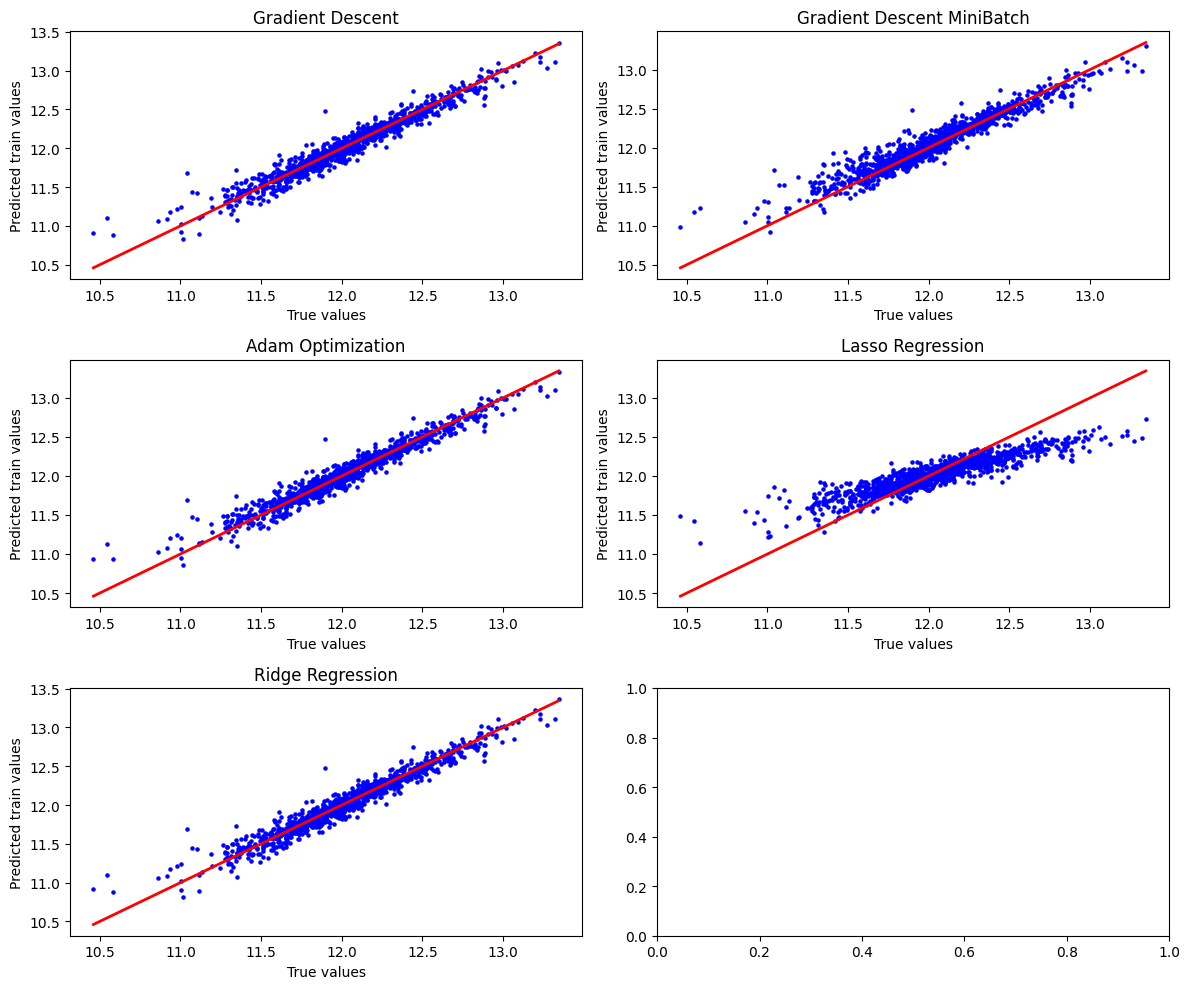

In [60]:
# Create subplots for predictions
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, (name, y_pred_train) in zip(axs.flatten(), predictions.items()):
    ax.scatter(y_train, y_pred_train, color="blue", s=5)
    ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linewidth=2)
    ax.set_title(name)
    ax.set_xlabel("True values")
    ax.set_ylabel("Predicted train values")

plt.tight_layout()
plt.show()


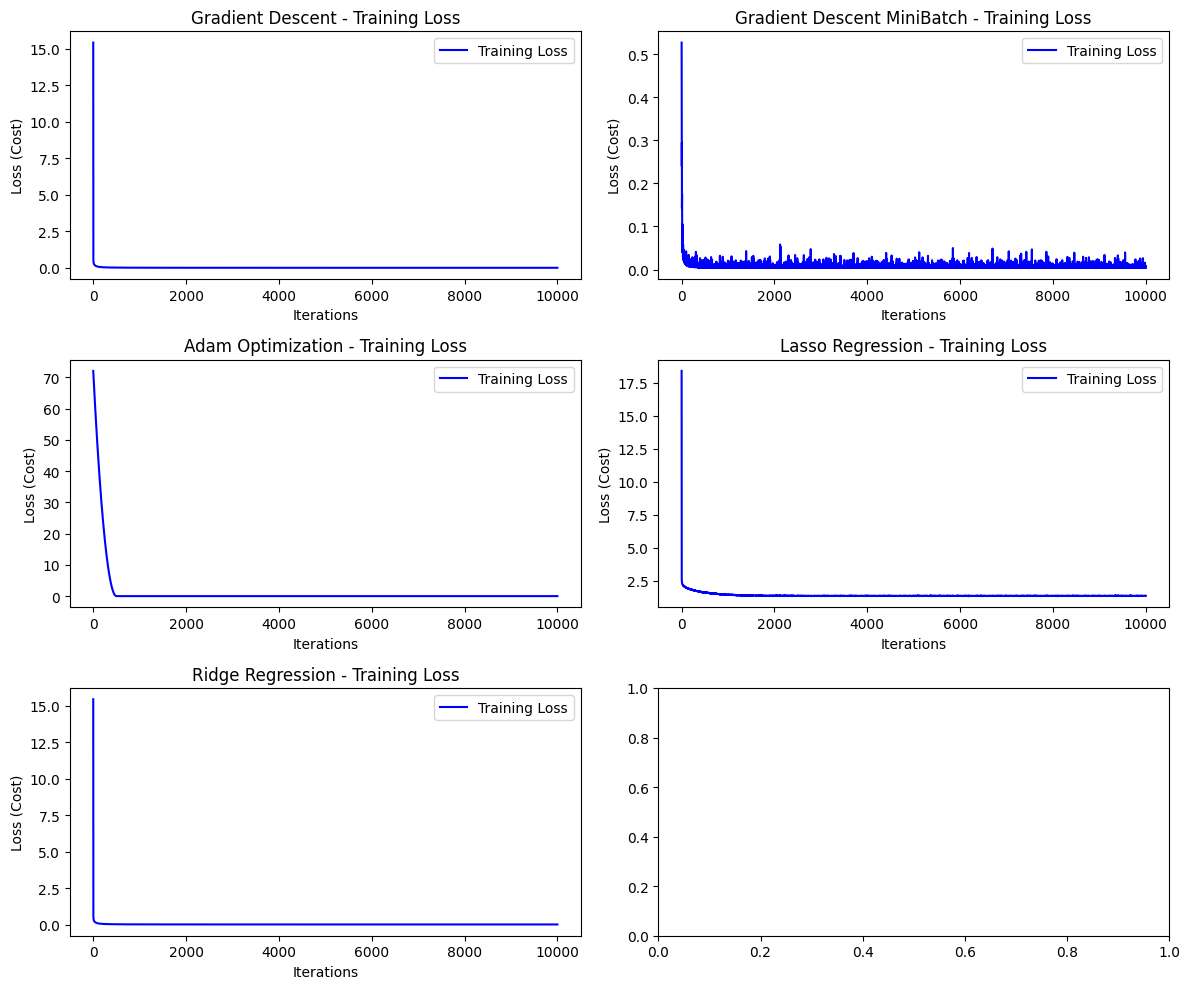

In [61]:
# Create subplots for training loss
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, (name, loss) in zip(axs.flatten(), training_losses.items()):
    ax.plot(loss, label="Training Loss", color="blue")
    ax.set_title(f"{name} - Training Loss")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss (Cost)")
    ax.legend()

plt.tight_layout()
plt.show()

# Predicting

In [62]:
def mean_squared_error_manual(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) between actual and predicted values.
    """
    n = len(y_true)
    return np.sum((y_true - y_pred) ** 2) / n

def r2_score_manual(y_true, y_pred):
    """
    Computes the R² Score (Coefficient of Determination).
    """
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    return 1 - (ss_residual / ss_total)

def evaluate_manual(y_true, y_pred, model_name):
    """
    Evaluates the performance of a regression model using manual MSE and R².
    """
    mse = mean_squared_error_manual(y_true, y_pred)
    r2 = r2_score_manual(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    return mse, r2


In [63]:
# Train best models and store training losses
losses_test = {}
predictions_test = {}

for name, model in best_models.items():
    y_pred_test = model.predict(X_val)
    predictions_test[name] = y_pred_test
    losses_test[name] = model.get_training_loss()

results = {}
for model_name, predictions in predictions_test.items():
    mse, r2 = evaluate_manual(y_val, predictions, model_name)
    results[model_name] = (mse, r2)

# Select the best model based on the lowest MSE (and highest R2 in case of tie)
best_model = max(results, key=lambda x: (-results[x][0], results[x][1]))
print(f"\nBest Model Selected: {best_model}")

Gradient Descent - MSE: 0.0153, R² Score: 0.9000
Gradient Descent MiniBatch - MSE: 0.0205, R² Score: 0.8662
Adam Optimization - MSE: 0.0158, R² Score: 0.8968
Lasso Regression - MSE: 0.0461, R² Score: 0.6987
Ridge Regression - MSE: 0.0152, R² Score: 0.9004

Best Model Selected: Ridge Regression


# Submit

In [64]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.487134,0.298147,-0.793450,0.381714,-0.337674,-1.152957,-0.576707,-0.688701,-0.238892,-0.553057,...,False,False,False,True,False,False,False,False,True,False
1462,0.536416,0.788867,-0.063858,0.381714,-0.436884,-1.298258,0.034686,-0.688701,-0.238892,-0.553057,...,False,False,False,True,False,False,False,False,True,False
1463,0.191445,0.707791,-0.793450,-0.515964,0.852846,0.639082,-0.576707,-0.688701,-0.238892,0.590085,...,False,False,False,True,False,False,False,False,True,False
1464,0.388571,-0.006860,-0.063858,0.381714,0.885916,0.639082,-0.463486,-0.688701,-0.238892,-0.553057,...,False,False,False,True,False,False,False,False,True,False
1465,-1.336282,-0.929486,1.395326,-0.515964,0.687496,0.348481,-0.576707,1.064466,-0.238892,0.590085,...,False,False,False,True,False,False,False,False,True,False


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Columns: 222 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(173), float64(49)
memory usage: 816.4 KB


In [66]:
test.index

Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
       ...
       2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
      dtype='int64', name='Id', length=1459)

In [67]:
if not vscode_info:
    test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
else:
    test_data = pd.read_csv("data/test.csv")

Id = test.index
# test_data[features] = test_data[features].fillna(test_data[features].median())
# test_data[features] = (test_data[features] - test_data[features].mean()) / test_data[features].std()

test = np.c_[np.ones((test.shape[0], 1)), test.values]

# Predict using the best model
final_predictions = best_models[best_model].predict(test)
final_predictions = np.array(final_predictions, dtype=float)

final_predictions = final_predictions.flatten()
final_predictions = np.exp(final_predictions)

print(f"Shape: {final_predictions.shape}, Dtype: {final_predictions.dtype}")

# Create submission file
submission = pd.DataFrame({"Id": Id, "SalePrice": final_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file generated: submission.csv")


Shape: (1459,), Dtype: float64
Submission file generated: submission.csv


In [68]:
submission.head()

,Id,SalePrice
0,1461,124942.246013
1,1462,166123.835736
2,1463,183934.097192
3,1464,202605.848129
4,1465,198417.531096
